In [1]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [2]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

/Users/utkarsh/GitHub/P_NS/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [4]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                   mean       std    median      5.0%     95.0%     n_eff     r_hat
   alpha_1[0]     -1.16      0.37     -1.20     -1.74     -0.56    342.97      1.00
   alpha_2[0]     -2.45      0.24     -2.43     -2.82     -2.06    306.64      1.00
 alpha_chi[0]      1.33      0.27      1.27      1.00      1.71    355.34      1.00
    beta_1[0]      1.12      0.48      1.08      0.39      1.95    454.15      1.00
    beta_2[0]      2.30      0.74      2.18      1.16      3.50    309.47      1.00
  beta_chi[0]      3.93      0.68      3.99      2.94      5.00    302.19      1.00
     kappa[0]      2.13      1.18      2.10      0.07      3.95    458.42      1.00
   m_break[0]      8.72      0.98      8.91      7.23     10.00    318.36      1.00
  mix_tilt[0]      0.48      0.29      0.48      0.05      0.92    560.31      1.00
   mixture[0]      0.61      0.09      0.61      0.45      0.74    286.40      1.00
   mu_peak[0]     31.51      1.28     31.65     29.32     33.23    122.25  

TypeError: prob_chi() got an unexpected keyword argument 'm'

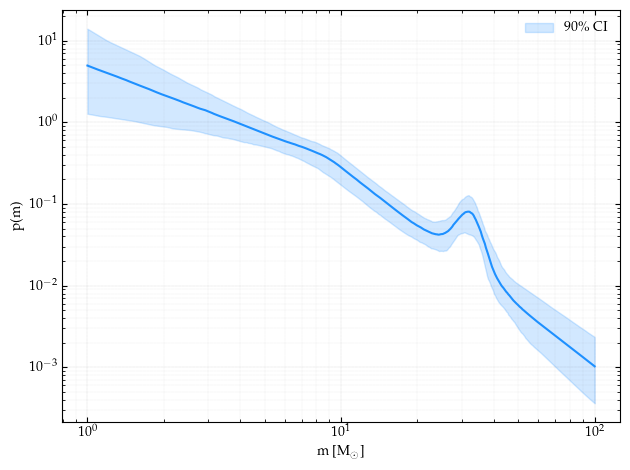

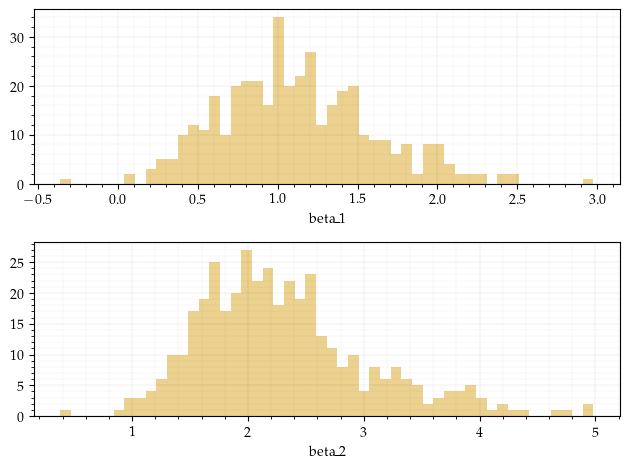

<Figure size 640x480 with 0 Axes>

In [7]:
from config.mass1d_func import bpl_peak
from config.spin_func import prob_chi, prob_costilt
from config.distance_func import powerlaw_redshift

plot_p_m(posterior_samples, function=bpl_peak)
plot_p_pairing(posterior_samples)
plot_p_chi(posterior_samples, function=prob_chi)
plot_p_costilt(posterior_samples, function=prob_costilt)
plot_p_z(posterior_samples, function=powerlaw_redshift)
plt.show()

In [ ]:
import arviz as az
data = az.from_numpyro(mcmc)
var_names_lst = get_non_deterministic_params(mcmc)

if len(var_names_lst) >= 20:
    cut1 = var_names_lst[:20]
    cut2 = var_names_lst[20:]

    assert len(cut1) + len(cut2) == len(var_names_lst)

    az.plot_trace(data, var_names=cut1, compact=True)
    plt.savefig("results/trace1.png")
    az.plot_trace(data, var_names=cut2, compact=True)
    plt.savefig("results/trace2.png")
else:
    az.plot_trace(data, var_names=var_names_lst, compact=True)
    plt.savefig("results/trace.png")